In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import glob

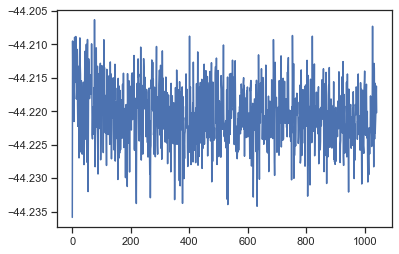

In [2]:
plt.plot(np.array(list(map(float,[i.split()[1] for i in open('xtb.trj.xyz','r').readlines() if 'energy' in i]))))

In [3]:
np.array(list(map(float,[i.split()[1] for i in open('xtb.trj.xyz','r').readlines() if 'energy' in i]))).shape

(1042,)

In [4]:
energy_list=[float(i.split()[1]) for i in open('xtb.trj.xyz','r').readlines() if 'energy' in i]
names=[f'struct_{i}' for i in range(len(energy_list))]

In [5]:
filenames=[f'struct_{i}.xyz' for i in range(len(energy_list))]

In [6]:
len(filenames)

1042

In [7]:
# Save file with energies to file
df=pd.DataFrame(energy_list,index=names,columns=['Energy (kcal/mol)'])
# .to_excel('energies.xlsx')

In [8]:
df

,Energy (kcal/mol)
struct_0,-44.235880
struct_1,-44.209511
struct_2,-44.216367
struct_3,-44.220814
struct_4,-44.218242
...,...
struct_1037,-44.221791
struct_1038,-44.220196
struct_1039,-44.219144
struct_1040,-44.216251


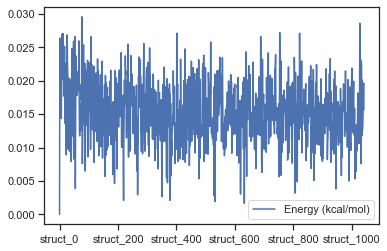

In [9]:
# We always use relative energies
(df-df.min()).plot()

In [10]:
# Split trj file into seperate xyz structures
result = []
sublist = []
for i in open('xtb.trj.xyz','r').readlines():
    if 'energy' in i:
        if sublist:
            result.append(sublist)
        sublist =[]
    else:
        sublist.append(i)
result.append(sublist)        

In [15]:
# os.listdir('STRUCTS')

In [12]:
# Place structures into a seperate file
lst=open('xtb.trj.xyz','r').readlines()
xyz=[lst[i:i + 37] for i in range(0, len(lst), 37)]
for idx,i in enumerate(filenames):
    textfile = open(os.path.join('STRUCTS',i), "w")
    textfile.write(''.join(xyz[idx]))
    textfile.close()

In [14]:
# Number of structures
print(len(xyz)==len(glob.glob('STRUCTS/*xyz')))

True
